In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
methods

[4, 4, 2, 3, 0, 1]

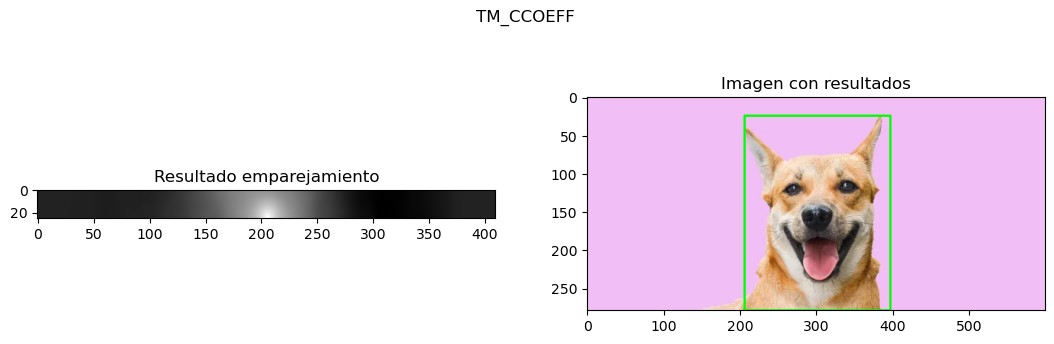

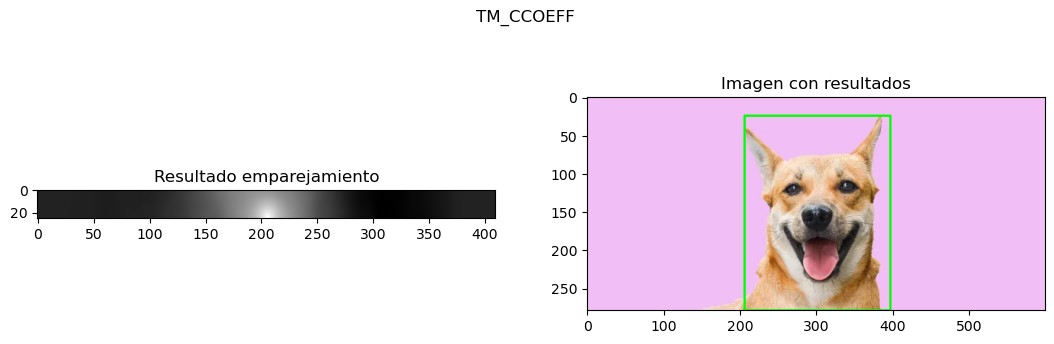

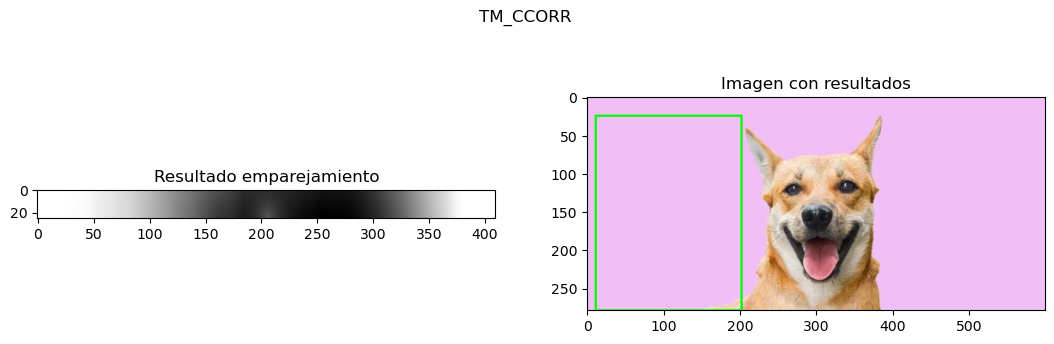

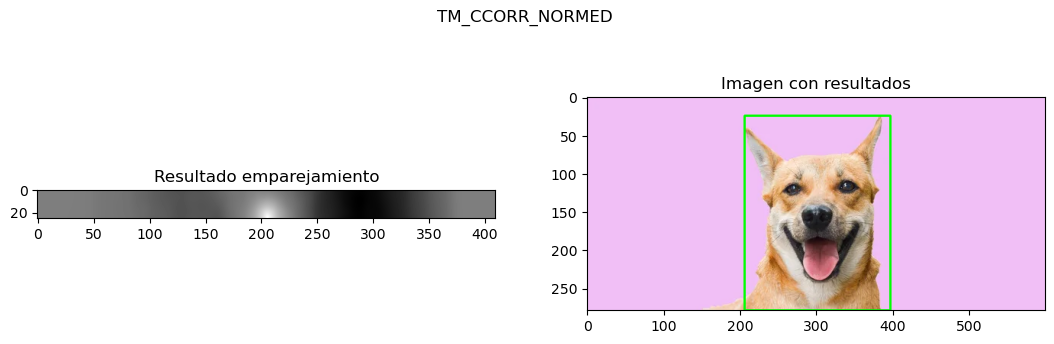

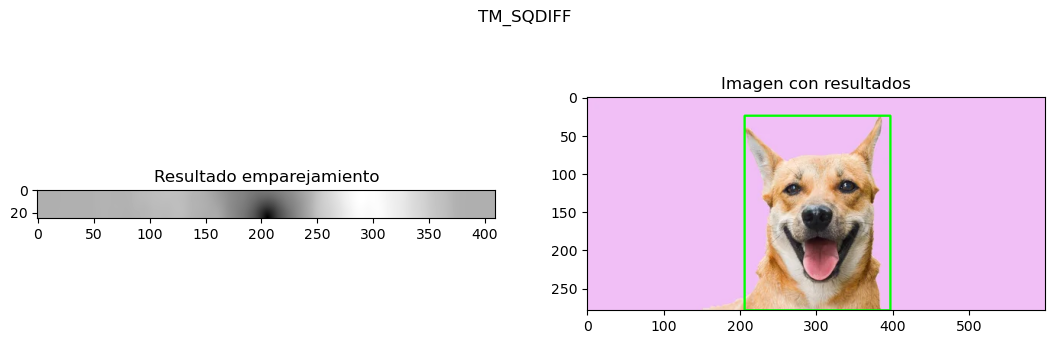

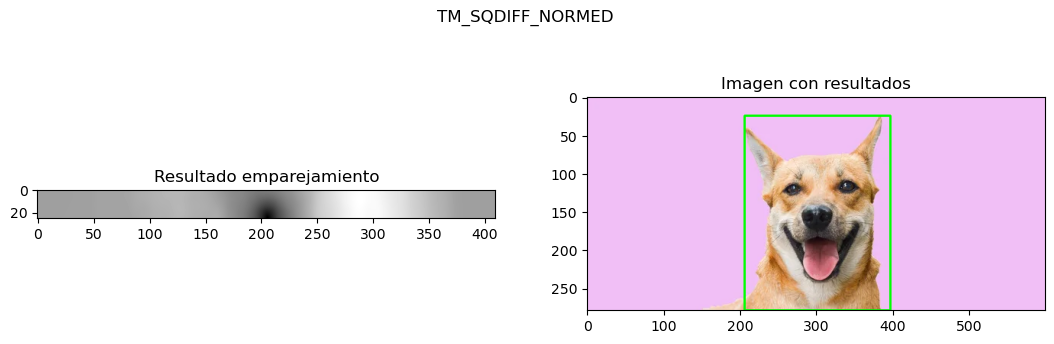

In [18]:
image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\perrito.jpg")
image_as_RGB = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2RGB)
image_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\perrito_plantilla.jpg")
template_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

h, w = template_as_GRAY.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
methods_names = ['TM_CCOEFF','TM_CCOEFF','TM_CCORR','TM_CCORR_NORMED','TM_SQDIFF','TM_SQDIFF_NORMED']
# como son 4 métodos, el for se acomoda al método. Se encarga de hacer el primer método, al segundo

for index, method in enumerate(methods):
    image_as_RGB_copied = image_as_RGB.copy()
    #print(index,method)
    result = cv2.matchTemplate(image_as_GRAY, template_as_GRAY, method)
    min_val, max_value, min_value_coordinate, max_value_coordinate = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_value_coordinate
    else:
        top_left = max_value_coordinate
    #print(min_val,max_value,min_value_coordinate,max_value_coordinate)
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    color = (0, 255, 0)
    cv2.rectangle(image_as_RGB_copied, top_left, bottom_right, color, 2)
    
    plt.figure(figsize = (13, 4))
    plt.subplot(1, 2, 1)
    plt.title("Resultado emparejamiento")
    plt.imshow(result, cmap = "gray")

    plt.subplot(1, 2, 2)
    plt.title("Imagen con resultados")
    plt.imshow(image_as_RGB_copied, cmap = "gray")

    plt.suptitle(methods_names[index])
    plt.show()

## a continuación se muestra cuando el algoritmo encuentra la cara del perrito en la imagen original.
## 

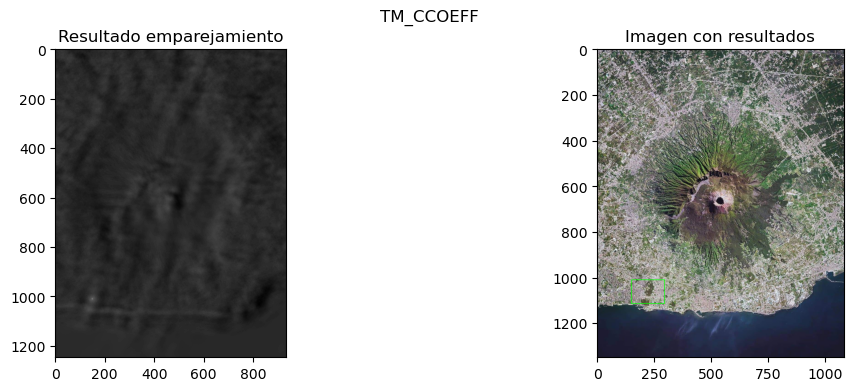

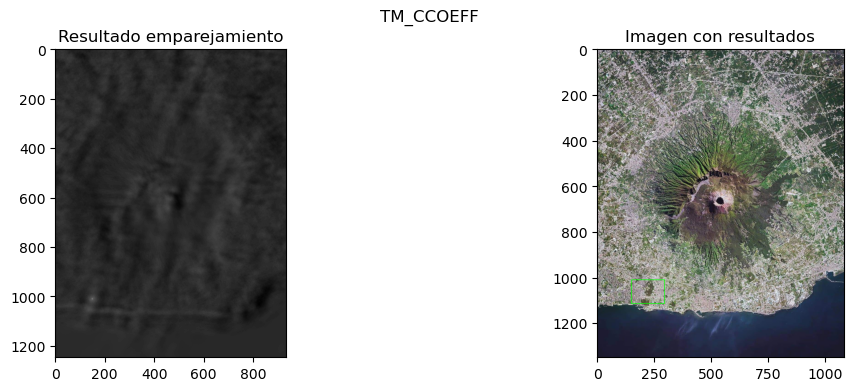

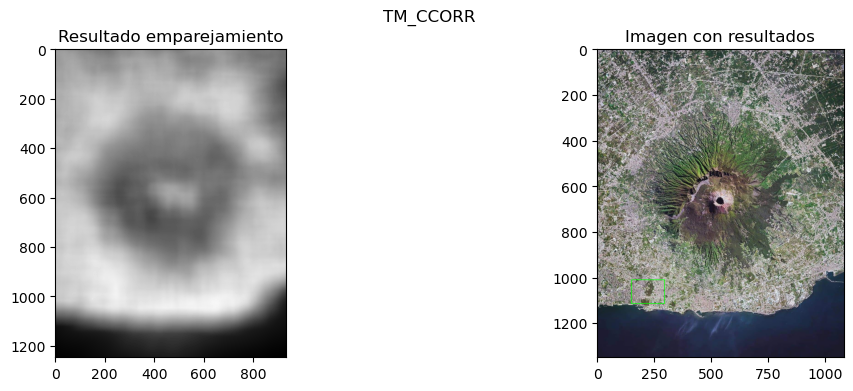

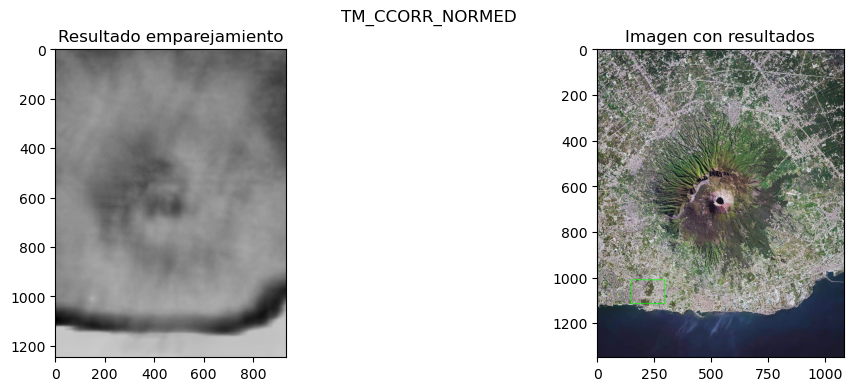

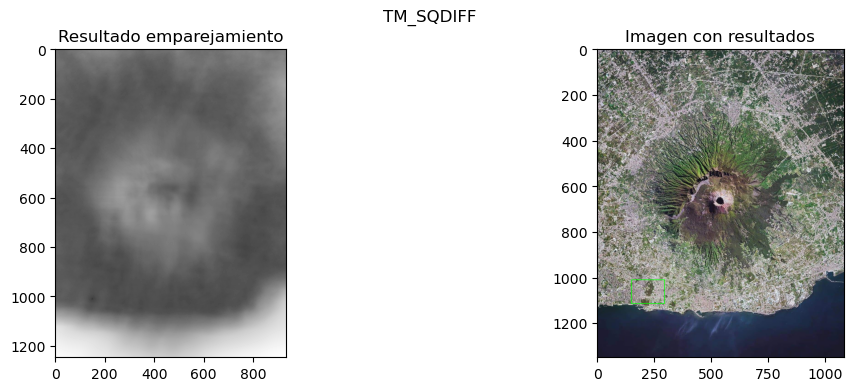

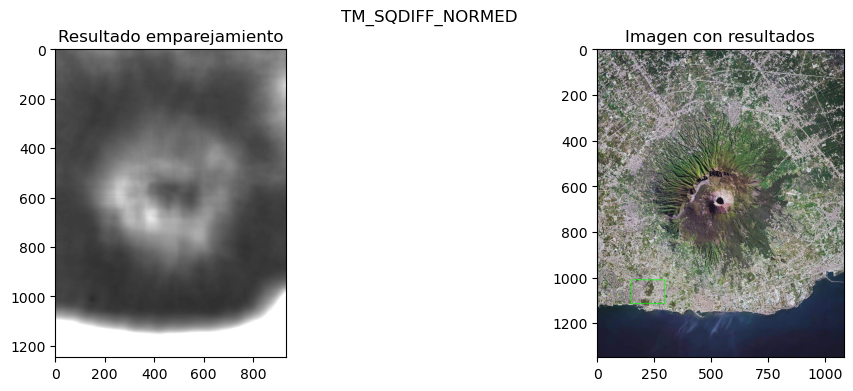

In [20]:
image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\monte_vesubio.jpg")
image_as_RGB = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2RGB)
image_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\monte_vesubio_plantilla.jpg")
template_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

h, w = template_as_GRAY.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
methods_names = ['TM_CCOEFF','TM_CCOEFF','TM_CCORR','TM_CCORR_NORMED','TM_SQDIFF','TM_SQDIFF_NORMED']
# como son 4 métodos, el for se acomoda al método. Se encarga de hacer el primer método, al segundo

for index, method in enumerate(methods):
    image_as_RGB_copied = image_as_RGB.copy()
    #print(index,method)
    result = cv2.matchTemplate(image_as_GRAY, template_as_GRAY, method)
    min_val, max_value, min_value_coordinate, max_value_coordinate = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_value_coordinate
    else:
        top_left = max_value_coordinate
    #print(min_val,max_value,min_value_coordinate,max_value_coordinate)
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    color = (0, 255, 0)
    cv2.rectangle(image_as_RGB_copied, top_left, bottom_right, color, 2)
    
    plt.figure(figsize = (13, 4))
    plt.subplot(1, 2, 1)
    plt.title("Resultado emparejamiento")
    plt.imshow(result, cmap = "gray")

    plt.subplot(1, 2, 2)
    plt.title("Imagen con resultados")
    plt.imshow(image_as_RGB_copied, cmap = "gray")

    plt.suptitle(methods_names[index])
    plt.show()

## a continuación se muestra cuando el algoritmo encuentra la cara del perrito en la imagen original.
## 

### Cómo detectar varios objetos a partir de una sola plantilla

In [9]:
# Aquí se utiliza el umbral para buscar las coordenadas de los puntos que más coinciden entre la plantilla y los n-objetos similares en la imagen original

image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\mario_2d.jpg")
image_as_RGB = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2RGB)
image_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

template_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\mario_2d_plantilla.jpg")
template_as_GRAY = cv2.cvtColor(template_as_BGR, cv2.COLOR_BGR2GRAY)

h, w = template_as_GRAY.shape

method = cv2.TM_CCOEFF_NORMED
result = cv2.matchTemplate(image_as_GRAY, template_as_GRAY, method)
valor_umbral = 0.97 # el umbral sirve para que de todos los puntos de los posibles objetos similares, se obtengan los mayores. Los que más coinciden. No se deja el umbral a 1, porque de lo contrario buscaría
                    # la coincidencia exacta.
location = np.where(result >= valor_umbral) # si result es mayor al umbral, obtiene la ubicación
location = location[::-1]

color = (0, 255, 0)
for point in zip(*location):
    cv2.rectangle(image_as_BGR, point, (point[0] + w, point[1] + h), color, 2)
    
cv2.imshow("Imagen con objetos encontrados", image_as_BGR)
cv2.waitKey(15000)
cv2.destroyAllWindows()